In [12]:
import matlab.engine
import numpy as np
import os

eng = matlab.engine.start_matlab()

project_root = r"D:/AAI/ACSS"
eng.cd(project_root, nargout=0)

eng.addpath(project_root, nargout=0)
eng.addpath(eng.genpath(project_root), nargout=0)

index = 1 # the index of example

# --- run parameter file ---
eng.run(f"src/example_{index}/parameter_1.m", nargout=0)

# --- build directory ---
build_dir = rf"D:/AAI/ACSS/_build/"
os.makedirs(build_dir, exist_ok=True)

eng.cd(build_dir, nargout=0)

# --- call wrapper ---
res = eng.run_model(
    f"src/example_{index}/topology_{index}.slx",
    "BuildDir", build_dir,
    "CleanAfterRun", True,
    nargout=1
)


In [16]:
t = np.array(res["t"]).flatten()
Vout = np.array(res["Vout"]).flatten()
print("settling time:", res["t_settle"])

settling time: 1.0


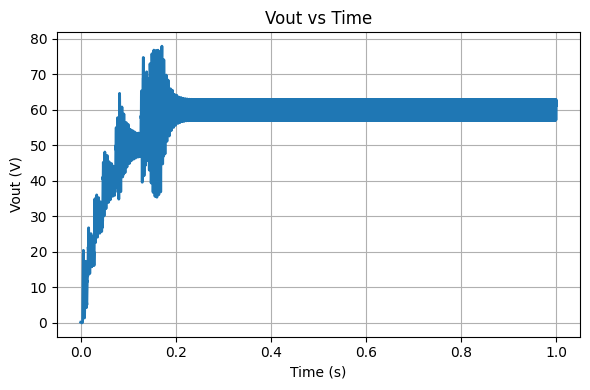

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(t, Vout, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Vout (V)")
plt.title("Vout vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()
